In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [5]:
df=pd.read_csv('../../Consolidated_Data/DCPP/Unitwise MW & Coal flow.xlsx')

In [7]:
df=df.set_index(df.columns[0],drop=True)
df.index=pd.to_datetime(df.index)

In [13]:
for i in df.columns:
    df[i]=pd.to_numeric(df[i],errors='coerce')

In [ ]:
df.isna().sum()

power1       0
power2       2
power3       0
power4       0
coal1        0
coal2     2976
coal3        0
coal4        0
dtype: int64

In [16]:
df=df.dropna()

[]

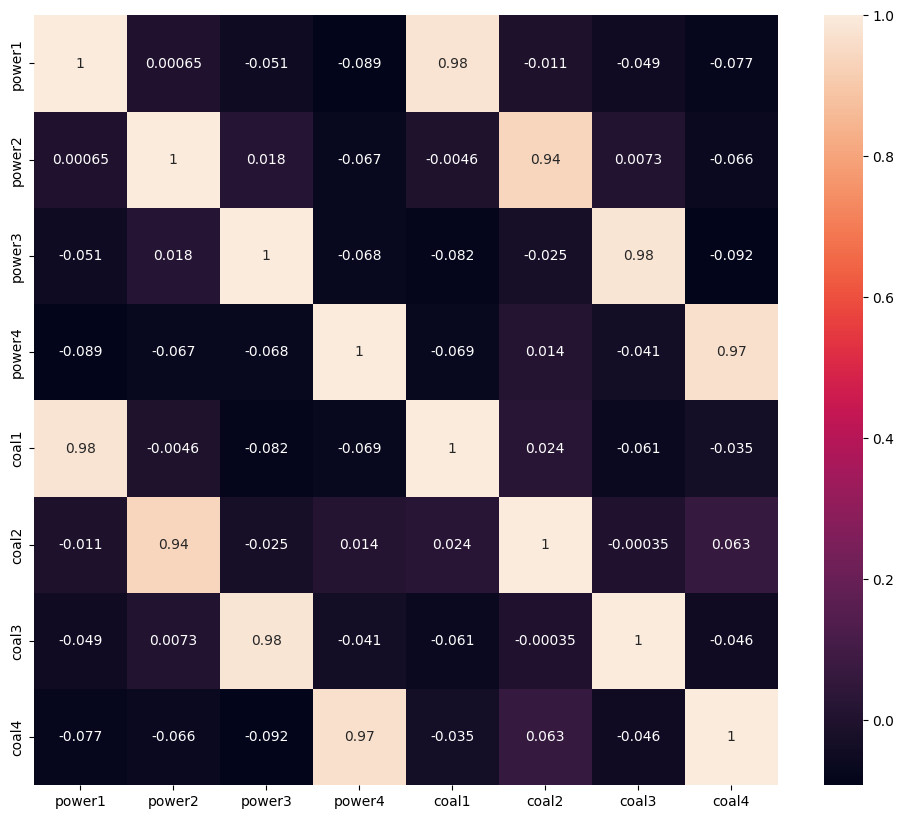

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.plot()

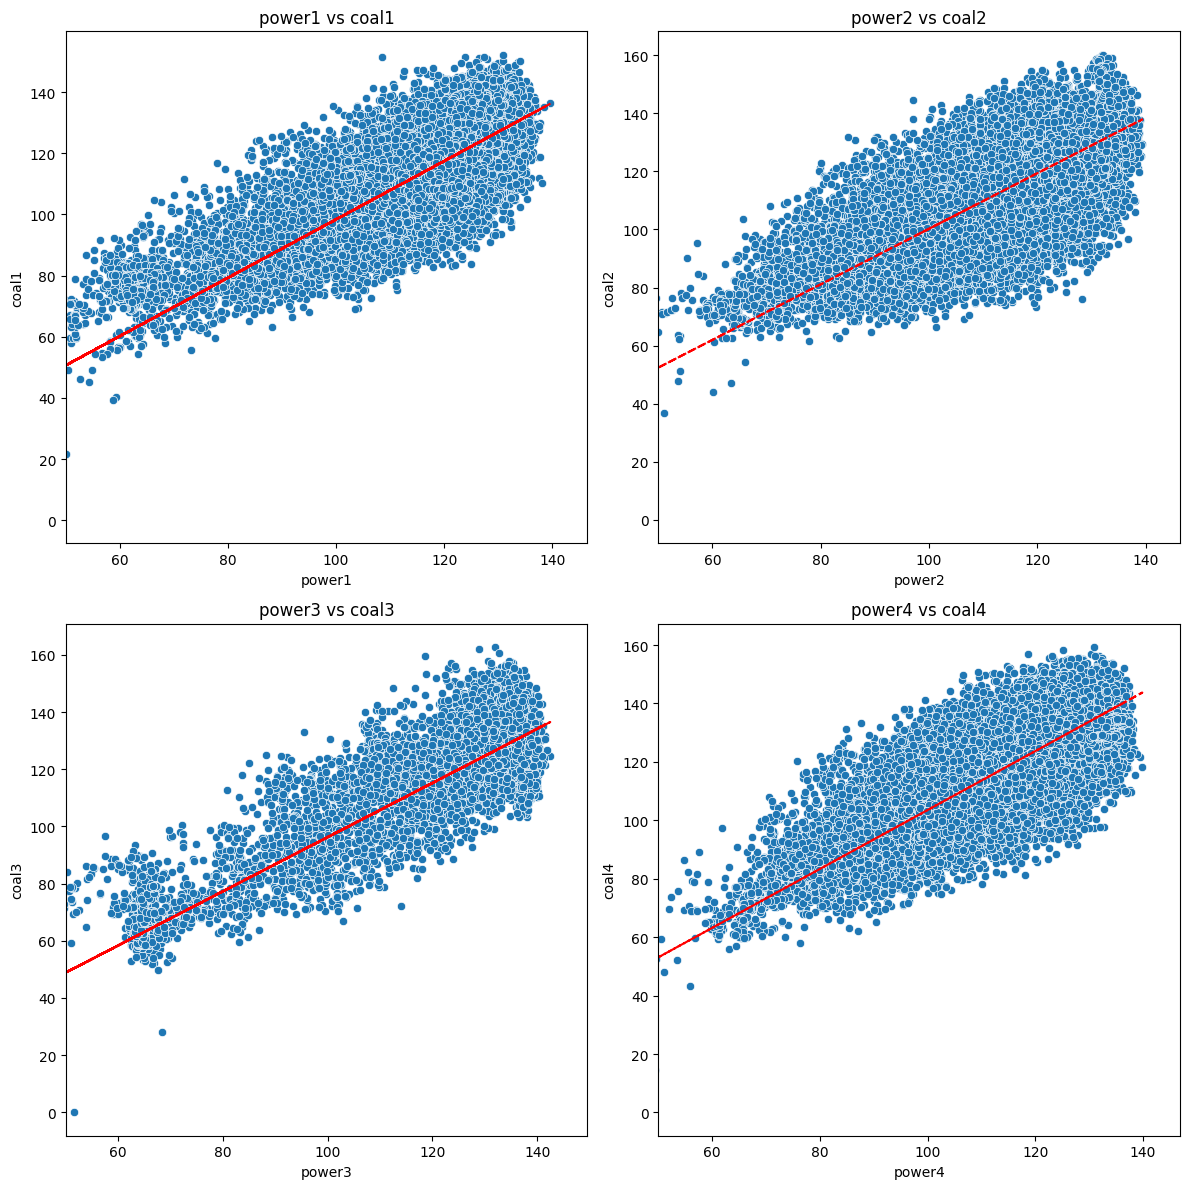

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

columns = ['power1', 'power2', 'power3', 'power4']
coal_columns = ['coal1', 'coal2', 'coal3', 'coal4']

for i, (power_col, coal_col) in enumerate(zip(columns, coal_columns)):
    ax = axs[i//2, i%2]
    sns.scatterplot(data=df, x=power_col, y=coal_col, ax=ax)
    
    # Fit a linear trend line
    m, b = np.polyfit(df[power_col], df[coal_col], 1)
    ax.plot(df[power_col], m*df[power_col] + b, color='red', linestyle='--')
    
    ax.set_title(f'{power_col} vs {coal_col}')
    ax.set_xlabel(power_col)
    ax.set_xlim(50,)
    ax.set_ylabel(coal_col)

plt.tight_layout()
plt.show()

In [24]:
data=df.iloc[:1000]

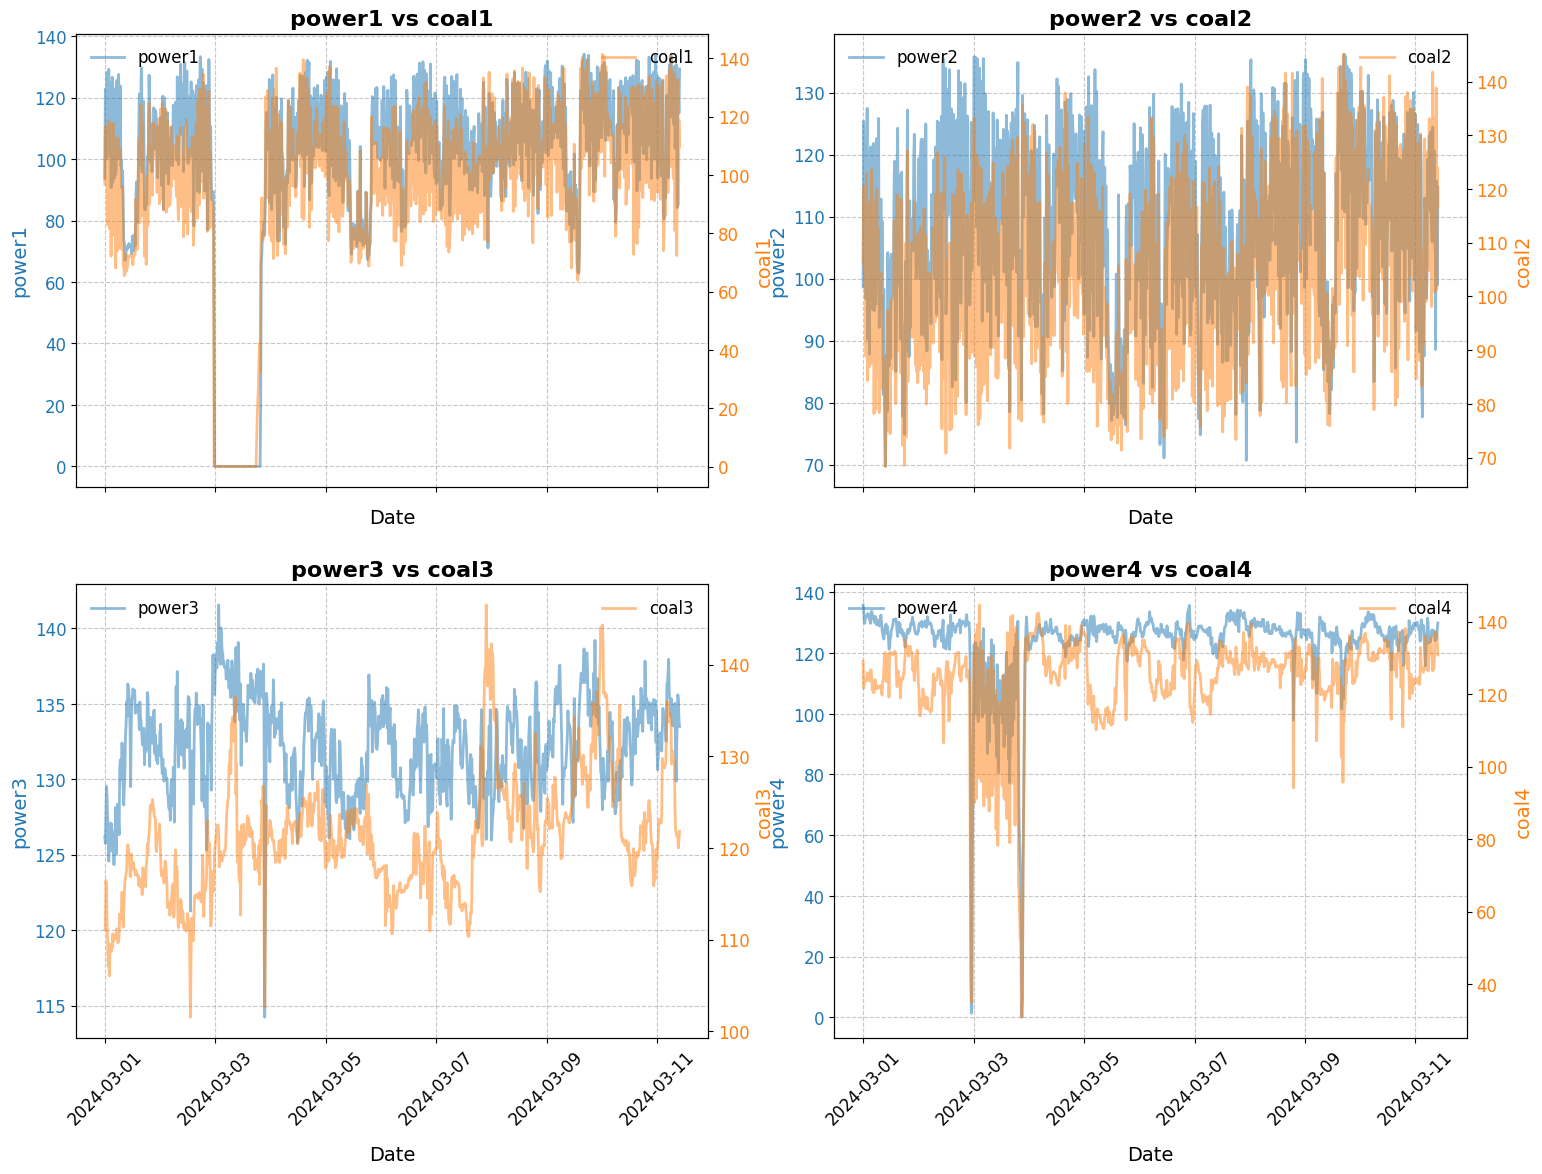

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
fig.tight_layout(pad=6.0)

power_columns = ['power1', 'power2', 'power3', 'power4']
coal_columns = ['coal1', 'coal2', 'coal3', 'coal4']

for i, ax in enumerate(axs.flatten()):
    power_col = power_columns[i]
    coal_col = coal_columns[i]
    
    ax.plot(data.index, data[power_col], color='#1f77b4', label=f'{power_col}', linewidth=2, alpha=0.5)
    
    ax2 = ax.twinx()
    ax2.plot(data.index, data[coal_col], color='#ff7f0e', label=f'{coal_col}', linewidth=2, alpha=0.5)

    ax.set_title(f'{power_col} vs {coal_col}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date', fontsize=14, labelpad=12)
    ax.set_ylabel(f'{power_col}', color='#1f77b4', fontsize=14)
    ax2.set_ylabel(f'{coal_col}', color='#ff7f0e', fontsize=14)

    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelcolor='#1f77b4', labelsize=12)
    ax2.tick_params(axis='y', labelcolor='#ff7f0e', labelsize=12)

    ax.grid(True, linestyle='--', alpha=0.7)  # Subtle gridlines
    ax.legend(loc='upper left', fontsize=12, frameon=False, bbox_to_anchor=(0, 1))
    ax2.legend(loc='upper right', fontsize=12, frameon=False, bbox_to_anchor=(1, 1))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
